In [607]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.io import loadmat
import matplotlib.pyplot as plt

# 1. Implement K-means clustering methods (40 points)

In [608]:
def calc_dist(X, y):
    return np.sqrt(((X - y)**2).sum(axis=1))

centroids = {}
def KMeans(X, K, n_iterations=30):
#     centroids = {}
    for cent in range(1, K+1):
        centroids[cent] = np.random.randn(1, X.shape[1])

    classes = []
    for _ in range(n_iterations):
        final_class = []
        min_distances = []
        classes = [] 
        for row in X:
            distances = []
            for cent in centroids: # Iterating over each centroids and calculating the distances
                distances.append(np.sqrt(((row - centroids[cent])**2).sum()))
            classes.append(np.argmin(distances)) # Assigning classes
            min_distances.append(np.min(distances)) # Getting the minimum distance
        classes, min_distances = np.array(classes), np.array(min_distances)

        for cent in centroids:
            if not (classes == cent).any():
                continue
            centroids[cent] = X[np.where(classes == cent)[0]].mean(axis=0)

    return list(centroids.values()), classes+1

# 2. Load data.mat and then perform K-means of x, show the intermediate figures, e.g., iteration = 100, 200, 300, ... (40 points)

In [609]:
data = loadmat('data.mat')
lbls = data['labels'].flatten()
X = data['x']
# print(X[:5])
# print(lbls[:5])
# print(len(X))
cents, preds = KMeans(X, K=31, n_iterations=100)
print("Centroids:", cents)
print("Classes:", preds)

Centroids: [array([-12.11224055,  -3.02257406,  -6.36763615]), array([-8.69978448, -1.0916284 , 11.5965833 ]), array([ -0.72998895, -15.79141463,  10.97559969]), array([17.27716197,  0.16801989, 12.58272328]), array([  4.47085673, -15.74457232,  -1.18836889]), array([  9.84027941, -11.66675316,  -4.43391588]), array([  9.64868848, -10.57734156,  -3.40393424]), array([11.35952089, -9.89349002, 14.51748522]), array([ 9.80161333, -8.5566256 , -0.30042982]), array([10.47020721, -9.63249969, -2.23010826]), array([ -7.77647497,  -3.59578477, -21.57676715]), array([-11.43713991,  16.84129432, -10.18182938]), array([-5.54799676, -0.87694991, -7.93922448]), array([  3.56687996,  -4.84080422, -17.66860747]), array([  1.21251928,   8.70974189, -31.23651532]), array([ -5.90834413,   4.46279815, -14.93269012]), array([-3.79257508, -0.57193641, -8.46802815]), array([-4.38447556,  0.66967326, -7.88420925]), array([-4.72271204, -0.2021293 , -7.23653316]), array([-4.72271204, -0.2021293 , -7.23653316])

In [610]:
((lbls.flatten() & preds) == 1).sum()/len(preds)

0.14056224899598393

In [611]:
cents, preds = KMeans(X, K=31, n_iterations=200)
print("Centroids:", cents)
print("Classes:", preds)

Centroids: [array([-11.3897266 ,  -1.55961002, -11.86053319]), array([-8.73916199, -0.08075956, 12.64028428]), array([  2.6718786 , -18.80789375,   4.01851129]), array([  9.47996921, -11.43371945,  -3.65157952]), array([ -5.75116735, -11.08742217,  12.6247139 ]), array([  2.57825564, -13.83335693,  15.86873362]), array([ -3.31219137, -10.56640959,   4.66694975]), array([ -3.31219137, -10.56640959,   4.66694975]), array([-1.70086464, -8.71301937,  9.46027172]), array([-2.20579895, -9.54843259,  6.75630224]), array([-3.051144  , -8.67068338,  6.64226413]), array([-1.68798327, -8.53087711,  7.0978775 ]), array([-1.68798327, -8.53087711,  7.0978775 ]), array([-1.68798327, -8.53087711,  7.0978775 ]), array([-1.68798327, -8.53087711,  7.0978775 ]), array([11.68086644, -9.58830237, 13.55603673]), array([17.36049737,  1.15107525, 12.35192794]), array([ 9.1265955 , -7.41681194,  1.69843304]), array([ 9.1265955 , -7.41681194,  1.69843304]), array([ -0.66452358,   2.92091805, -28.38153648]), arra

In [612]:
cents, preds = KMeans(X, K=31, n_iterations=300)
print("Centroids:", cents)
print("Classes:", preds)

Centroids: [array([  9.47996921, -11.43371945,  -3.65157952]), array([-11.14480003,  19.81877687,  -9.32321986]), array([ -7.52734235,   0.71482382, -15.2652818 ]), array([-4.73814444, -0.16378811, -7.74489427]), array([-3.26249194, -1.27705514, -7.84781146]), array([ -0.45149483, -14.87873891,   8.6108701 ]), array([15.33273115, -7.77408343, 18.05647598]), array([-9.13717738,  4.63019615, 12.02530222]), array([-6.65336968, -8.46986654, 13.65659546]), array([-10.14194647,   1.40967604,   8.42845472]), array([-12.83168358,  -6.87621297,  -7.71054702]), array([-13.62680798,  -2.27681627,   6.60242624]), array([-8.91372108, -1.64288926,  1.7426486 ]), array([-10.05354118,  -0.76179326,   3.9682405 ]), array([-7.94784069, -0.43279627,  5.48397986]), array([16.73214458,  3.54182418, 10.04187587]), array([13.01736195, 14.53196397,  6.98224572]), array([5.67122065, 8.7978758 , 5.28602242]), array([ 7.29360962,  5.6587038 , -3.34856677]), array([ 7.29360962,  5.6587038 , -3.34856677]), array([

In [613]:
df= pd.DataFrame({"X1":X[:, 0], "X2":X[:, 1], "X3":X[:, 2], "Labels": lbls.flatten(), "Predicted": preds})

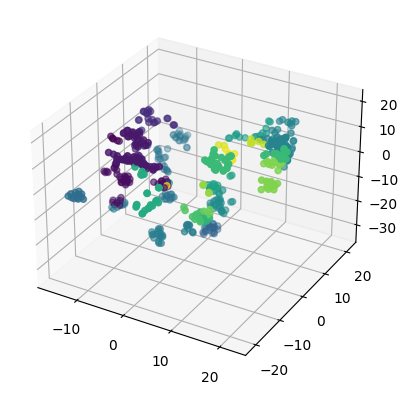

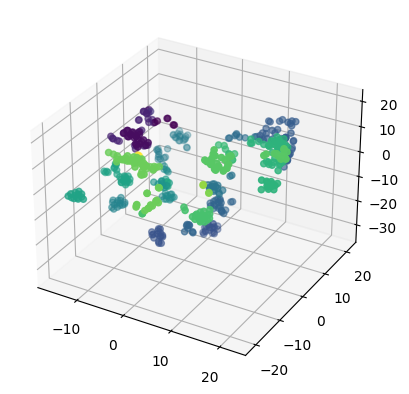

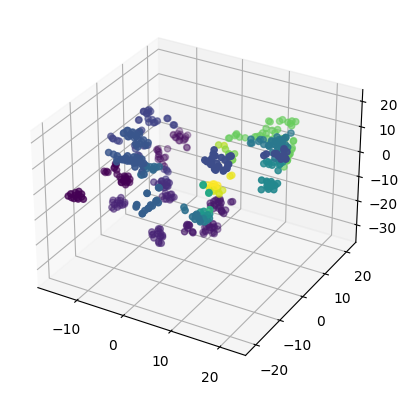

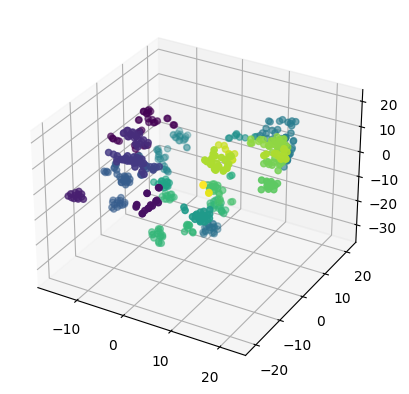

In [614]:
for i in [100, 300, 500, 700]:
    fig = plt.figure()
    ax = plt.axes(projection = '3d')
    _, preds = KMeans(X, K=32, n_iterations=i)
    ax.scatter(df.X1, df.X2, df.X3, c=preds);
    plt.show()

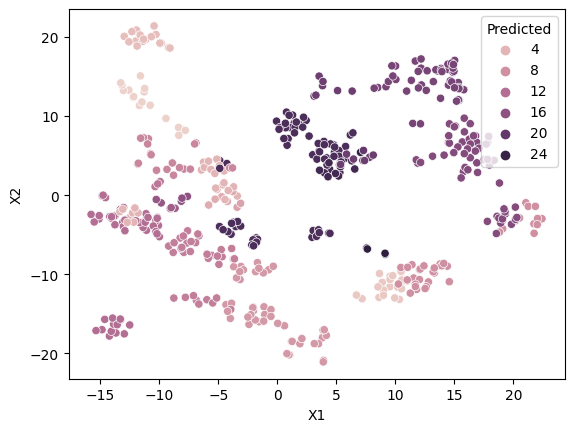

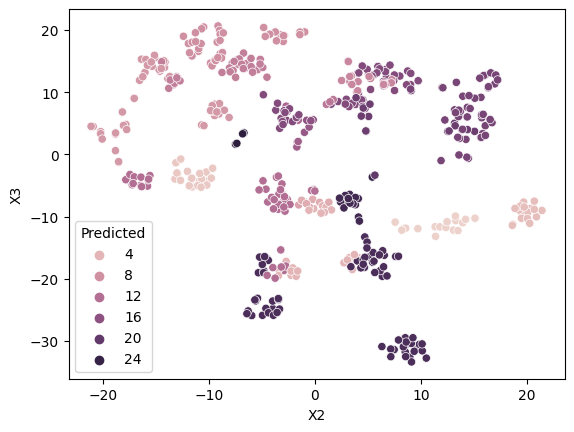

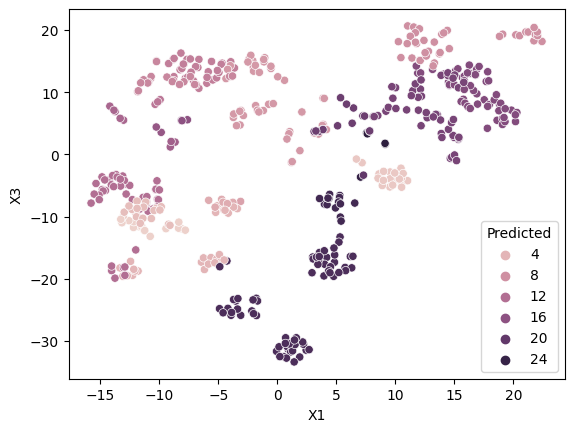

In [615]:
combinations = [["X1", "X2"], ['X2', 'X3'], ['X1', "X3"]]

for comb in combinations:
    sns.scatterplot(x = comb[0], y = comb[1] ,hue='Predicted',data=df)
    plt.show()

# 3. Calculate the accuracy using labels (20 points)

The ARI (adjusted Rand index) measures the similarity between the predicted cluster labels and the true labels, taking into account the possibility of random labeling. It ranges from -1 to 1, where a score of 1 indicates perfect clustering and a score of 0 indicates that the clustering is no better than random labeling.

#### Trying different iterations

In [616]:
def cal_acc(preds):
    accuracies = []
    for i in range(1,32):
        class_indices = np.where(df['Labels'] == i)[0]
        class_labels = preds[class_indices]
        major_label = np.bincount(class_labels).argmax()
        correct_predictions = np.sum(class_labels == major_label)
        accuracy = correct_predictions / len(class_labels)
        accuracies.append(accuracy)
    return np.mean(accuracies)

        
cal_acc(preds)
# Calculate overall accuracy
overall_accuracy = np.mean(accuracies)
overall_accuracy

0.9012828540403984

In [617]:
for i in list(range(100, 1200, 100)):
    _, preds = KMeans(X, K = 32, n_iterations = i)
    print(f"Iterations: {i}, Accuracy: {cal_acc(preds)}")
#     print(((lbls & preds) == 1).sum()/len(preds))
    

Iterations: 100, Accuracy: 0.8751869828708946
Iterations: 200, Accuracy: 0.8932031787226784
Iterations: 300, Accuracy: 0.8932606790827397
Iterations: 400, Accuracy: 0.8851608254534328
Iterations: 500, Accuracy: 0.8946777684680911
Iterations: 600, Accuracy: 0.9034295872355186
Iterations: 700, Accuracy: 0.8577635681264149
Iterations: 800, Accuracy: 0.8952975758777009
Iterations: 900, Accuracy: 0.8496053143295599
Iterations: 1000, Accuracy: 0.8724164608659927
Iterations: 1100, Accuracy: 0.8960594498575769
